In [1]:
#!pip install pyreadstat openpyxl pandas jupyter statsmodels scikit-learn pandas-profiling[notebook]

In [2]:
# convert DAT files to various other more interchangeable formats

from pathlib import Path
import pandas as pd


def convert(df_data, filename):
    outdir = 'converted'
    fname = Path(filename).stem
    partial = f'{outdir}/{fname}'
    
    if not Path(f'{partial}.csv').is_file():
        df_data.to_csv(f'{partial}.csv')
        df_data.to_excel(f'{partial}.xlsx')
        df_data.to_stata(f'{partial}.dta')
    

for file in Path('data').glob('*.DAT'):
    df_convert = pd.read_csv(file, sep='\t')
    df_convert.set_index(df_convert.columns[0], inplace=True)
    convert(df_convert, file)

# Day 1 - initialize data
Load the data and describe it a bit

In [3]:
from pandas_profiling import ProfileReport
import pandas as pd


filename = 'converted/EX0502.csv'
df_data = pd.read_csv(filename).set_index('PERSON')

df_data

,SBP,QUET,AGE,SMK
PERSON,,,,
1,135,2.876,45,0
2,122,3.251,41,0
3,130,3.100,49,0
4,148,3.768,52,0
5,146,2.979,54,1
6,129,2.790,47,1
7,162,3.668,60,1
8,160,3.612,48,1
9,144,2.368,44,1


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SBP     32 non-null     int64  
 1   QUET    32 non-null     float64
 2   AGE     32 non-null     int64  
 3   SMK     32 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
df_data.describe()

,SBP,QUET,AGE,SMK
count,32.000000,32.000000,32.000000,32.000000
mean,144.531250,3.441094,53.250000,0.531250
std,14.397545,0.497078,6.956083,0.507007
min,120.000000,2.368000,41.000000,0.000000
25%,134.750000,3.022250,48.000000,0.000000
50%,143.000000,3.380500,53.500000,1.000000
75%,152.000000,3.776000,58.250000,1.000000
max,180.000000,4.637000,65.000000,1.000000


In [6]:
# describe the data a bit using pandas-profiling

profile = ProfileReport(df_data, title="Pandas Profiling Report")
#profile.to_notebook_iframe()
profile.to_widgets()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Train an ordinary least squares linear regression model using statmodels api

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm


x_label = 'QUET'
y_label = 'SBP'

# df_data.sort_values(y_label, inplace=True)
x = df_data[x_label]
y = df_data[y_label]

X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

print()
print('Parameters:')
print(results.params)

print()
print('R2:', results.rsquared)

print()
print('Standard errors:')
print(results.bse)

print()
print('95% CI (Students-T distribution):')
print(results.conf_int(.05))

print()
print('Residuals:')
print(results.resid)

print()
print('Predicted values:', results.predict())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     36.75
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           1.17e-06
Time:                        21:22:11   Log-Likelihood:                -117.45
No. Observations:                  32   AIC:                             238.9
Df Residuals:                      30   BIC:                             241.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.5764     12.322      5.728      0.0

/home/thomas/work/nihes/ESP09/venv/lib64/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/home/thomas/work/nihes/ESP09/venv/lib64/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


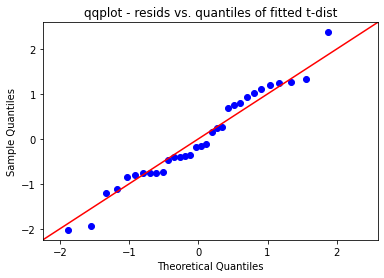

In [8]:
import scipy.stats as stats
from matplotlib import pyplot as plt


res = results.resid
pplot = sm.ProbPlot(res, stats.t, fit=True)
fig = pplot.qqplot(line="45")
h = plt.title("qqplot - resids vs. quantiles of fitted t-dist")
plt.show()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
PERSON,,,,,,
1,132.386442,2.649855,126.974717,137.798168,111.630567,153.142318
2,140.445818,1.860783,136.645593,144.246043,120.050688,160.840948
3,137.200576,2.114377,132.882443,141.518709,116.702628,157.698524
4,151.557011,2.086020,147.296790,155.817231,131.071184,172.042837
5,134.600084,2.385796,129.727638,139.472531,113.978243,155.221926
6,130.538159,2.887257,124.641594,136.434724,109.650625,151.425693
7,149.407844,1.911921,145.503180,153.312508,128.992996,169.822692
8,148.204311,1.837242,144.452162,151.956459,127.818084,168.590537
9,121.468675,4.181013,112.929908,130.007442,99.687257,143.250092


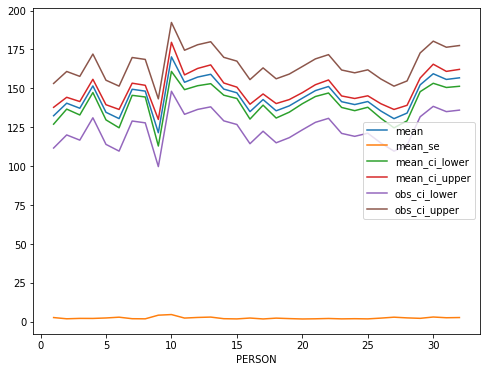

In [9]:
predictions = results.get_prediction()
df_summary = predictions.summary_frame(alpha=0.05)

df_summary.plot(figsize=(8, 6))

df_summary

## Answers day 1

In [10]:
# Provide the least-squares regression equation

trans = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

params = results.params

β0, β1 = params

print(f'y = β0 + β1x'.translate(trans))
print(f'y = {round(β0, 3)} + {round(β1, 3)}x')

y = β₀ + β₁x
y = 70.576 + 21.492x


In [11]:
# Test the null hypothesis of zero slope, provide p-value and conclusion.
import scipy.stats


crit = scipy.stats.t.ppf(q=1-0.05/2, df=results.df_resid)

print('T', f'{results.tvalues[1]:.3f}')
print(f'T > {round(crit, 3)} = significant')

print()
print('P', f'{results.f_pvalue:.6f}')
print(f'P < .05 = significant')

if results.f_pvalue < .05 and results.tvalues[1] > crit:
    print()
    print('H0 rejected'.translate(trans), 'slope not equal to 0')
    print(f'Significant linear relationship between {x_label} and {y_label}')

T 6.062
T > 2.042 = significant

P 0.000001
P < .05 = significant

H₀ rejected slope not equal to 0
Significant linear relationship between QUET and SBP


In [12]:
# Provide a confidence interval for the estimated slope and interpret (using proper units)

# manual check
print('Manual:')
print(β1 - crit * results.bse[1], '-', β1 + crit * results.bse[1])

# automatic
print()
print('Automatic:')
print('95% CI (Students-T distribution): ')
print(results.conf_int(.05))


Manual:
14.251512580518334 - 28.73182480072691

Automatic:
95% CI (Students-T distribution): 
               0          1
const  45.411792  95.741015
QUET   14.251513  28.731825


In [13]:
# For Person 1 (QUET=2.876), provide the predicted value (fit), and the 95% confidence 

QUET = 2.876
test_results = results.get_prediction([1, QUET])

print('Manual check:    ', β0 + β1 * QUET)  # double-check

print('Model predict(): ')  # Model prediction
test_results.summary_frame()




Manual check:     132.38644234585848
Model predict(): 


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,132.386442,2.649855,126.974717,137.798168,111.630567,153.142318


In [14]:
# Using the ANOVA Table, provide the r-square (and r) values, interpret.
from statsmodels.formula.api import ols


mod = ols(f'{x_label} ~ {y_label}',
                data=df_data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

print()
print('R2: ', results.rsquared)

interpret = f"""
R2 is low at 55% explained variance by {x_label}.
"""

print(interpret)

            sum_sq    df          F    PR(>F)
SBP       4.217193   1.0  36.751221  0.000001
Residual  3.442492  30.0        NaN       NaN

R2:  0.5505700193721006

R2 is low at 55% explained variance by QUET.



In [15]:
# Using the z-transformation: test the null hypothesis of zero correlation (by hand).
